In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download German stop words
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('german'))

# create a list of documents
documents = []



for file in os.listdir('comments_json_anonym'):
    text = ""

    with open('comments_json/'+file.split('_comments')[0]+'.txt','r',encoding='utf-8') as f:
        text += f.read()
    
    text += '\n'
    with open('comments_json_anonym/'+file,'r',encoding='utf-8') as f:
        data = json.load(f)
    for comment in data:
        text += comment['text']
        if 'answers' in comment:
            for answer in comment['answers']:
                text += answer['text']

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
            
    documents.append(" ".join(filtered_words))

# create the tf-idf vectorizer
vectorizer = TfidfVectorizer()

# fit the vectorizer to the documents
tfidf = vectorizer.fit_transform(documents)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


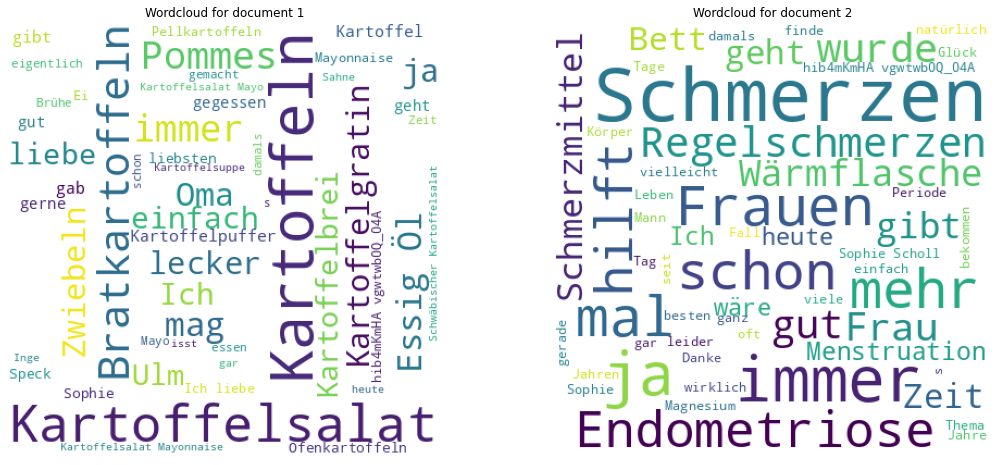

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs = [documents[177],documents[187]]
# create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

for doc_index in range(len(docs)):
    wordcloud = WordCloud(width = 400, height = 400,
        background_color ='white',
        stopwords = None,
        min_font_size = 10).generate(docs[doc_index])
    axs[doc_index].imshow(wordcloud)
    axs[doc_index].axis("off")
    axs[doc_index].set_title(f'Wordcloud for document {doc_index+1}')


plt.show()

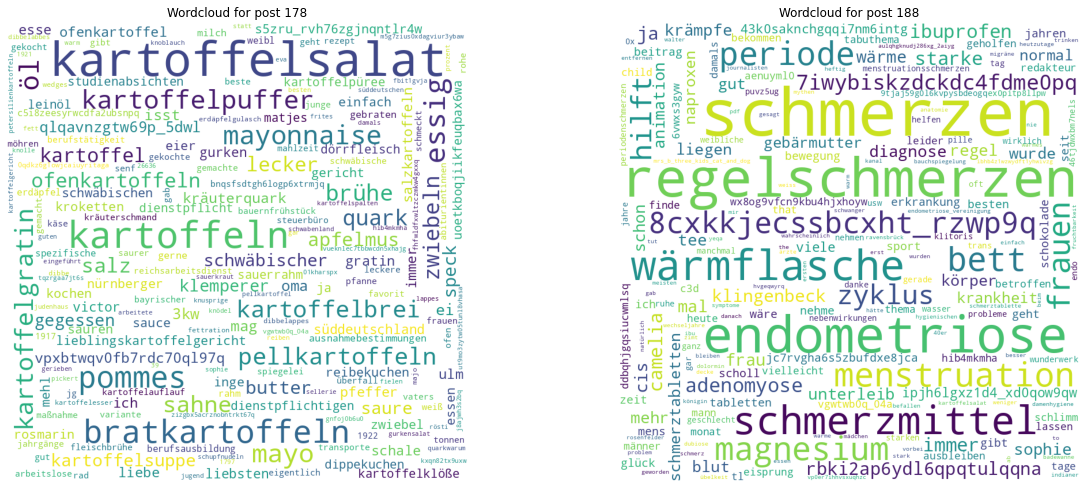

In [5]:
import pandas as pd

docids = [177,187]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

for i,id in enumerate(docids):
        df = pd.DataFrame(tfidf[id].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
        df = df.sort_values('TF-IDF', ascending=False)
        doc_dict = df.to_dict()

        wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate_from_frequencies(doc_dict['TF-IDF'])
        axs[i].imshow(wordcloud)
        axs[i].axis("off")
        axs[i].set_title(f'Wordcloud for post {id+1}')
# Plot the wordcloud
plt.axis("off")
plt.tight_layout(pad = 5)
plt.show()